### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import re
import random

C:\Users\Vipra\anaconda3\envs\DS-Inno\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vipra\anaconda3\envs\DS-Inno\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Vipra\anaconda3\envs\DS-Inno\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Importing the dataset

In [142]:
df = pd.read_csv("Schools.csv")
df

,Unnamed: 0,School Name,Type,Location,Ratings,Annual Fees,Registered Boards,Secondary/Middle,Gender
0,0,The Hyderabad Public School,Private Unaided/Independent,Ramanthapur,AAAAA,143139.0,CBSE,['Secondary'],['Co-ed']
1,1,CHIREC International School,NaN,Kondapur,AAAAA,643500.0,IBCAIECBSE,['Secondary'],['Co-ed']
2,2,The Aga Khan Academy,Private,Hyderabad,AAAAA,1805000.0,IB,['Secondary'],['Co-ed']
3,3,Bharatiya Vidya Bhavans Atmakuri Rama Rao School,Private Unaided/Independent,Jubilee Hills,AAAA+,42000.0,CBSE,['Secondary'],['Co-ed']
4,4,Delhi Public School,Private Unaided/Independent,Khajaguda,AAAA+,221000.0,CBSE,['Secondary'],['Co-ed']
...,...,...,...,...,...,...,...,...,...
2140,2140,Kendriya Vidyalaya,Central Government,SVP National Police Academy,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
2141,2141,Phoenix Greens School Of Learning,NaN,Kokapet,NaN,NaN,CBSECAIE,['Secondary'],['Co-ed']
2142,2142,Kendriya Vidyalaya,Central Government,Sattenapalli,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
2143,2143,Silver Oaks International School,NaN,Bachupally,NaN,NaN,IBCBSE,['Secondary'],['Co-ed']


### Understanding the dataset

In [3]:
df.head()

,Unnamed: 0,School Name,Type,Location,Ratings,Annual Fees,Registered Boards,Secondary/Middle,Gender
0,0,The Hyderabad Public School,Private Unaided/Independent,Ramanthapur,AAAAA,143139.0,CBSE,['Secondary'],['Co-ed']
1,1,CHIREC International School,NaN,Kondapur,AAAAA,643500.0,IBCAIECBSE,['Secondary'],['Co-ed']
2,2,The Aga Khan Academy,Private,Hyderabad,AAAAA,1805000.0,IB,['Secondary'],['Co-ed']
3,3,Bharatiya Vidya Bhavans Atmakuri Rama Rao School,Private Unaided/Independent,Jubilee Hills,AAAA+,42000.0,CBSE,['Secondary'],['Co-ed']
4,4,Delhi Public School,Private Unaided/Independent,Khajaguda,AAAA+,221000.0,CBSE,['Secondary'],['Co-ed']


In [4]:
df.tail()

,Unnamed: 0,School Name,Type,Location,Ratings,Annual Fees,Registered Boards,Secondary/Middle,Gender
2140,2140,Kendriya Vidyalaya,Central Government,SVP National Police Academy,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
2141,2141,Phoenix Greens School Of Learning,NaN,Kokapet,NaN,NaN,CBSECAIE,['Secondary'],['Co-ed']
2142,2142,Kendriya Vidyalaya,Central Government,Sattenapalli,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
2143,2143,Silver Oaks International School,NaN,Bachupally,NaN,NaN,IBCBSE,['Secondary'],['Co-ed']
2144,2144,Kendriya Vidyalaya,Central Government,Rajampet,NaN,12025.0,CBSE,['Secondary'],['Co-ed']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2145 non-null   int64  
 1   School Name        2145 non-null   object 
 2   Type               1935 non-null   object 
 3   Location           2115 non-null   object 
 4   Ratings            68 non-null     object 
 5   Annual Fees        286 non-null    float64
 6   Registered Boards  2145 non-null   object 
 7   Secondary/Middle   2145 non-null   object 
 8   Gender             1037 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 150.9+ KB


In [6]:
df.describe()

,Unnamed: 0,Annual Fees
count,2145.000000,2.860000e+02
mean,1072.000000,9.092207e+04
std,619.352484,1.911041e+05
min,0.000000,1.800000e+03
25%,536.000000,1.625000e+04
50%,1072.000000,4.351500e+04
75%,1608.000000,9.264000e+04
max,2144.000000,2.070500e+06


### Data cleaning

In [7]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

### 1. Missing Value Treatment

#### Viewing the missing values in our dataset

<Axes: >

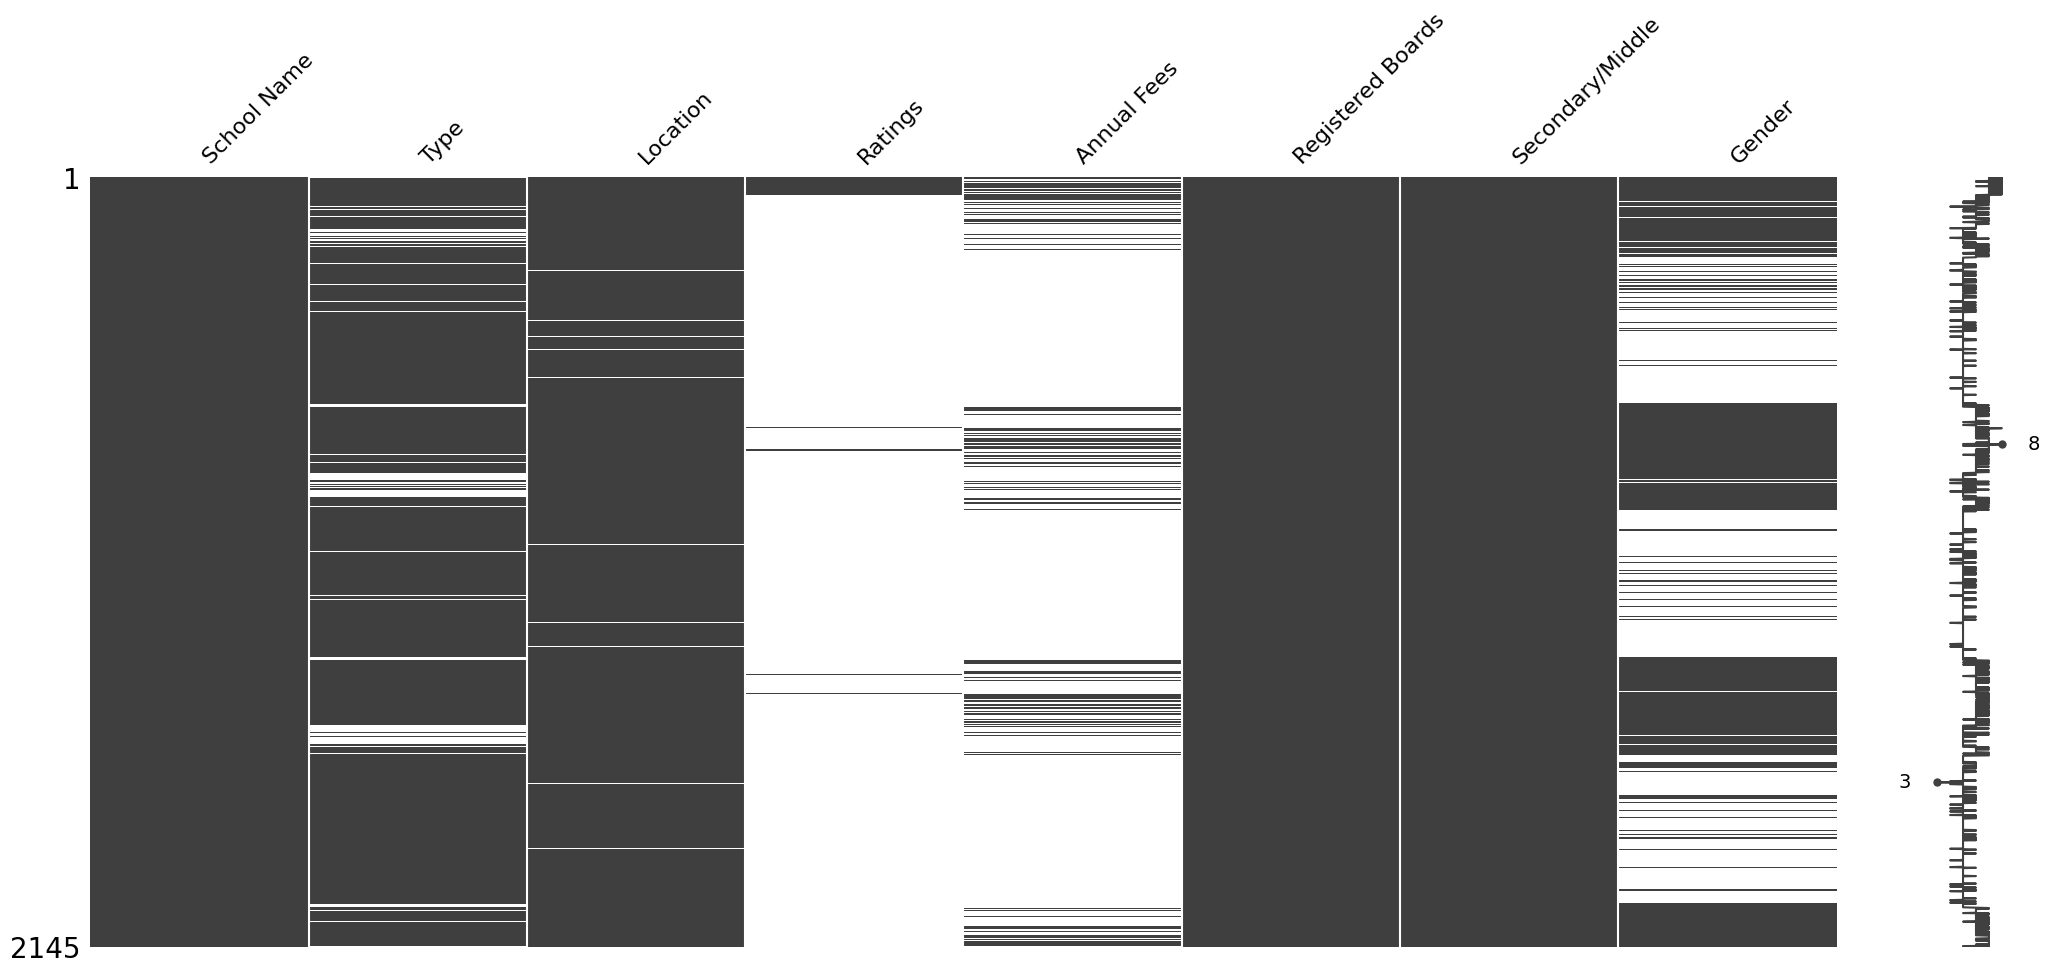

In [8]:
msn.matrix(df) 

##### Inferences: From above matrix plot, we can see that there are missing values in Type, Location, Ratings, Annual Fees and Gender, which are important for our analysis. Hence, we decide to drop the rows corresponding to missing values in Location, and impute the missing values in remaining features.

In [9]:
df.dropna(subset=['Location'],axis=0,inplace=True)

#### 2. Removing Duplicates

In [10]:
df.duplicated().sum()

318

In [11]:
df.drop_duplicates(keep = 'first',inplace = True)

In [12]:
df.reset_index(inplace = True)

In [13]:
df.drop(columns = 'index',axis = 1, inplace = True)

#### Missing value treatment (continued)

In [14]:
df

,School Name,Type,Location,Ratings,Annual Fees,Registered Boards,Secondary/Middle,Gender
0,The Hyderabad Public School,Private Unaided/Independent,Ramanthapur,AAAAA,143139.0,CBSE,['Secondary'],['Co-ed']
1,CHIREC International School,NaN,Kondapur,AAAAA,643500.0,IBCAIECBSE,['Secondary'],['Co-ed']
2,The Aga Khan Academy,Private,Hyderabad,AAAAA,1805000.0,IB,['Secondary'],['Co-ed']
3,Bharatiya Vidya Bhavans Atmakuri Rama Rao School,Private Unaided/Independent,Jubilee Hills,AAAA+,42000.0,CBSE,['Secondary'],['Co-ed']
4,Delhi Public School,Private Unaided/Independent,Khajaguda,AAAA+,221000.0,CBSE,['Secondary'],['Co-ed']
...,...,...,...,...,...,...,...,...
1792,Kendriya Vidyalaya,Central Government,SVP National Police Academy,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
1793,Phoenix Greens School Of Learning,NaN,Kokapet,NaN,NaN,CBSECAIE,['Secondary'],['Co-ed']
1794,Kendriya Vidyalaya,Central Government,Sattenapalli,NaN,12025.0,CBSE,['Secondary'],['Co-ed']
1795,Silver Oaks International School,NaN,Bachupally,NaN,NaN,IBCBSE,['Secondary'],['Co-ed']


In [15]:
df['Type'].fillna('Private',inplace = True)

In [16]:
school_type = []
for i in df.index:
    j = df['Type'][i]
    if j == 'Government':
        if (df.iloc[i]['School Name'] == 'Eklavya Model Residential School'):
            j = 'Central Government'
        elif (df.iloc[i]['School Name'] == 'Manuu Model School'):
            j = 'Central Government'
        elif ('KGBV' in df.iloc[i]['School Name']):
            j = 'Central Government'
        else:
            j = 'State Government'
    elif j == 'Private Unaided/Independent':
        j = 'Private'
    school_type.append(j)
df['Type'] = school_type

In [19]:
def ratings_encoding(rating):
    ratings = 0
    if rating != 0:
        if '+' in rating:
            ratings = rating.count('A') + 0.5
        else:
            ratings = rating.count('A')
    return ratings


In [20]:
df['Ratings'].fillna(0,inplace = True)
df['Ratings'] = df['Ratings'].apply(ratings_encoding)

In [35]:
def ratings_fill(m):
    if m != 0:
        return m
    else:
        dfm = df.loc[m]
        if (dfm['School Name'] == 'Kendriya Vidyalaya'):
            m = round(random.uniform(4,5),1)
        elif (dfm['School Name'] == 'Jawahar Navodaya Vidyalaya'):
            m = round(random.uniform(4.5,5),1)
        elif ('KGBV' in dfm['School Name']):
            m = round(random.uniform(3,5),1)
        elif ('APSWR' in dfm['School Name']):
            m = round(random.uniform(3.5,4.5),1)
        elif (dfm['Registered Boards'] == 'CBSE'):
            m = round(random.uniform(3.5,5),1)
        elif ('IB' in dfm['Registered Boards']):
            m = round(random.uniform(4.5,5),1)
        elif ('CAIE' in dfm['Registered Boards']):
            m = round(random.uniform(4.5,5),1)
        elif ('ICSE' in dfm['Registered Boards']):
            m = round(random.uniform(4,5),1)
        elif ('BSE' in dfm['Registered Boards']):
            m = round(random.uniform(3,4.5),1)
        else:
            m = round(random.uniform(3,5),1)
        

#        m = df.groupby(['Type','Registered Boards','Secondary/Middle'])['Ratings'].transform(lambda x: x.fillna(df[df['Ratings']!=np.nan]['Ratings'].mode()))
    return m

In [36]:
df['Ratings'] = df['Ratings'].apply(ratings_fill)

In [37]:
df['Annual Fees'] = df.groupby(by=["Type","Location","Registered Boards","Ratings","Secondary/Middle"])['Annual Fees'].transform(lambda x: x.fillna(df[df['Annual Fees']!=np.nan]['Annual Fees'].median()))

In [38]:
df['Gender'] = df.groupby(by=["Type","Location","Registered Boards","Ratings","Secondary/Middle"])['Gender'].transform(lambda x: x.fillna(df[df['Gender']!=np.nan]['Gender'].mode()[0]))

In [39]:
def secondary_fill(n):
    if n == '':
        n = 'Secondary'
    return n
df['Secondary/Middle'] = df['Secondary/Middle'].apply(secondary_fill)

In [40]:
df.isnull().sum()

School Name          0
Type                 0
Location             0
Ratings              0
Annual Fees          0
Registered Boards    0
Secondary/Middle     0
Gender               0
dtype: int64

### 2. Data formatting and type conversion

In [41]:
Secondary = []
for i in df['Secondary/Middle']:
    i = re.sub("[\[\'\]']","",i)
    Secondary.append(str(i))
df['Secondary/Middle'] = Secondary

In [42]:
Gender = []
for i in df['Gender']:
    i = re.sub("[\[\'\]']","",i)
    Gender.append(str(i))
df['Gender'] = Gender

In [43]:
Location = []
for i in df['Location']:
    i = re.sub("\s","",i)
    Location.append(str(i))
df['Location'] = Location

In [44]:
df['Annual Fees'] = df['Annual Fees'].astype('int64')

In [45]:
df

,School Name,Type,Location,Ratings,Annual Fees,Registered Boards,Secondary/Middle,Gender
0,The Hyderabad Public School,Private,Ramanthapur,5.0,143139,CBSE,Secondary,Co-ed
1,CHIREC International School,Private,Kondapur,5.0,643500,IBCAIECBSE,Secondary,Co-ed
2,The Aga Khan Academy,Private,Hyderabad,5.0,1805000,IB,Secondary,Co-ed
3,Bharatiya Vidya Bhavans Atmakuri Rama Rao School,Private,JubileeHills,4.5,42000,CBSE,Secondary,Co-ed
4,Delhi Public School,Private,Khajaguda,4.5,221000,CBSE,Secondary,Co-ed
...,...,...,...,...,...,...,...,...
1792,Kendriya Vidyalaya,Central Government,SVPNationalPoliceAcademy,4.6,12025,CBSE,Secondary,Co-ed
1793,Phoenix Greens School Of Learning,Private,Kokapet,4.0,43200,CBSECAIE,Secondary,Co-ed
1794,Kendriya Vidyalaya,Central Government,Sattenapalli,4.5,12025,CBSE,Secondary,Co-ed
1795,Silver Oaks International School,Private,Bachupally,4.8,43200,IBCBSE,Secondary,Co-ed


### Resetting the index of dataframe

In [46]:
df.reset_index(inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1797 non-null   int64  
 1   School Name        1797 non-null   object 
 2   Type               1797 non-null   object 
 3   Location           1797 non-null   object 
 4   Ratings            1797 non-null   float64
 5   Annual Fees        1797 non-null   int64  
 6   Registered Boards  1797 non-null   object 
 7   Secondary/Middle   1797 non-null   object 
 8   Gender             1797 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.5+ KB


In [48]:
df.drop(columns = 'index',axis = 1, inplace = True)

### Data Visualization

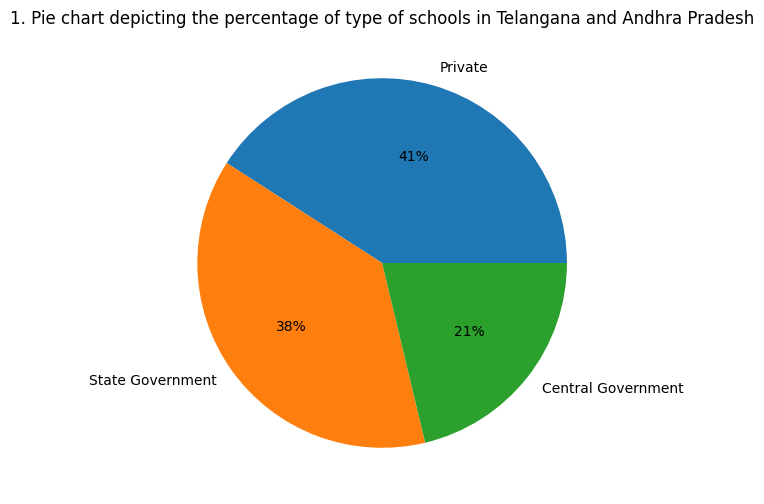

In [49]:
plt.figure(figsize=(6,6))
df['Type'].value_counts().plot(kind = 'pie',autopct = "%0.0f%%")
plt.title("1. Pie chart depicting the percentage of type of schools in Telangana and Andhra Pradesh")
plt.ylabel('')
plt.show()

##### Inference 1: From the above pie chart, we can infer that there are more State Government schools in the top schools list from Telangana and Andhra Pradesh

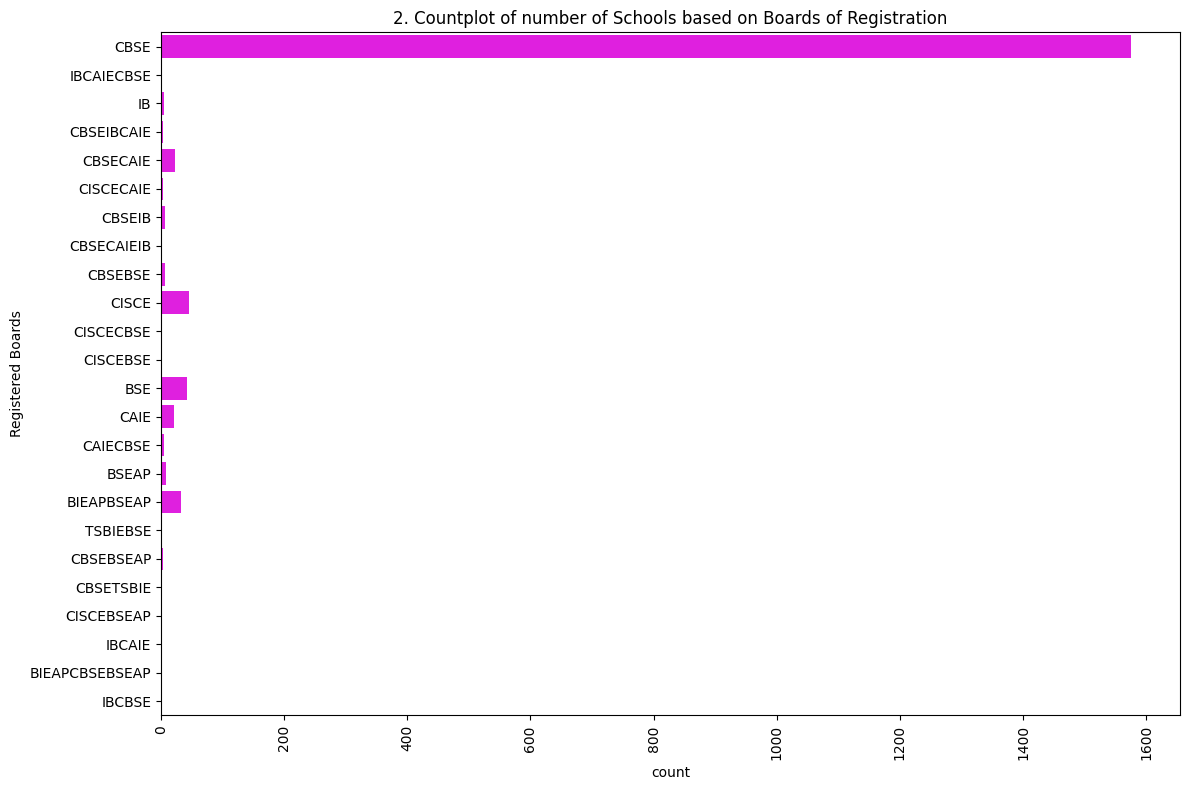

In [50]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

rb = sns.countplot(data = df,y='Registered Boards',color = 'magenta')
plt.xticks(rotation = 90)
plt.title("2. Countplot of number of Schools based on Boards of Registration")
plt.show()

##### Inference 2: From the above countplot, we can infer that most of the schools in Telangana and Andhra Pradesh are registered under CBSE board.

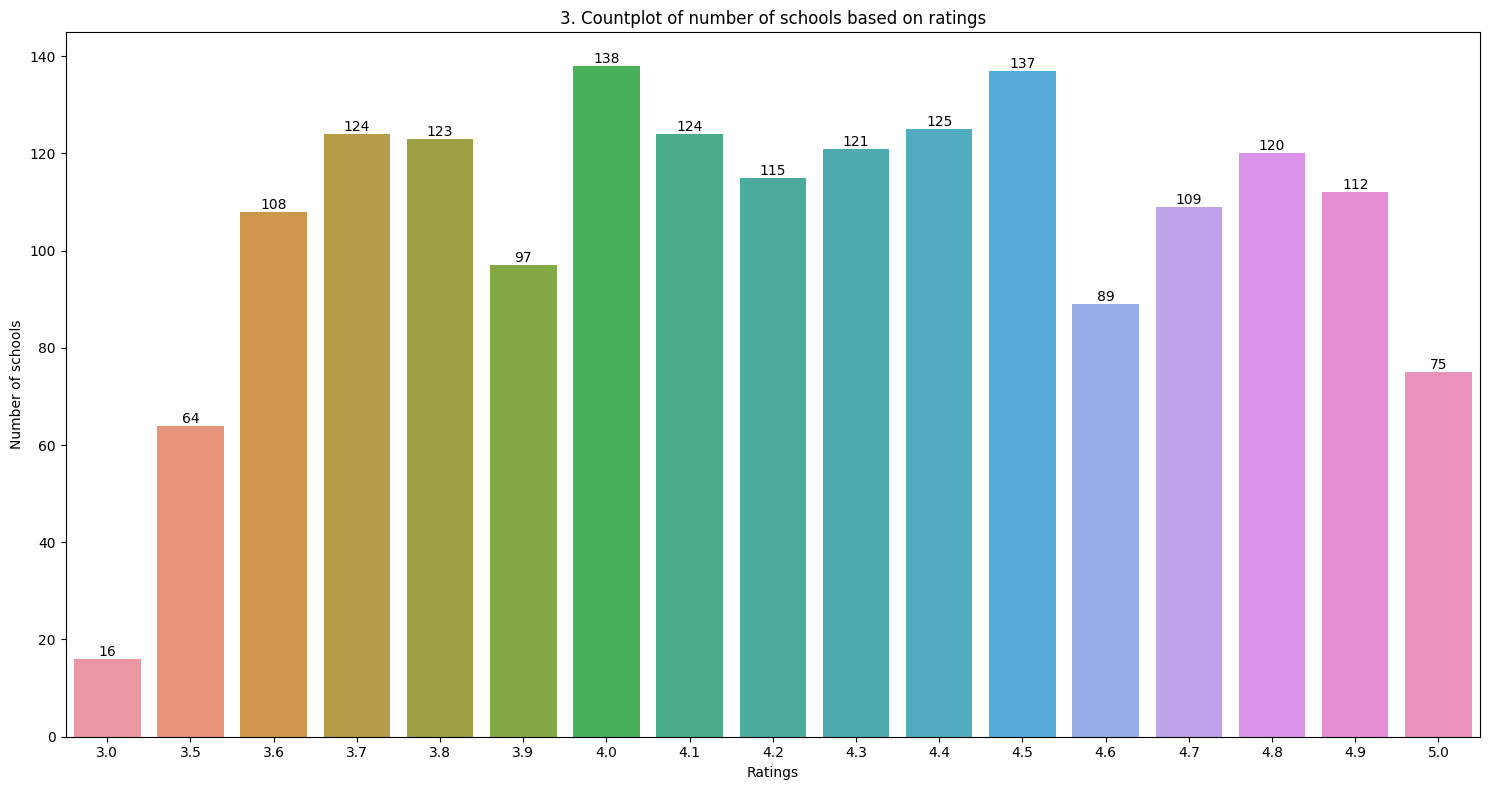

In [51]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df,x='Ratings')
for label in ax.containers:
    ax.bar_label(label)
plt.title("3. Countplot of number of schools based on ratings")
plt.ylabel("Number of schools")
plt.show()

##### Inference 3: From the above countplot, we can infer that 4 is the ratings given to most of the schools. Hence, average rating for the schools is 4.

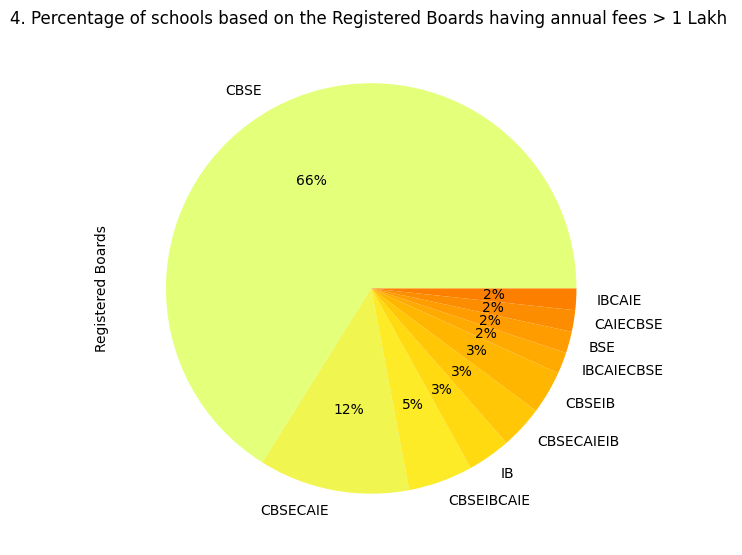

In [52]:
plt.figure(figsize=(6,6))
df[df['Annual Fees'] > 100000]['Registered Boards'].value_counts().head(20).plot(kind = 'pie',autopct = "%0.0f%%",cmap = 'Wistia')
plt.title("4. Percentage of schools based on the Registered Boards having annual fees > 1 Lakh ")
plt.show()

##### Inference 4: The pie plot above shows that there are more schools registered under the CBSE board 

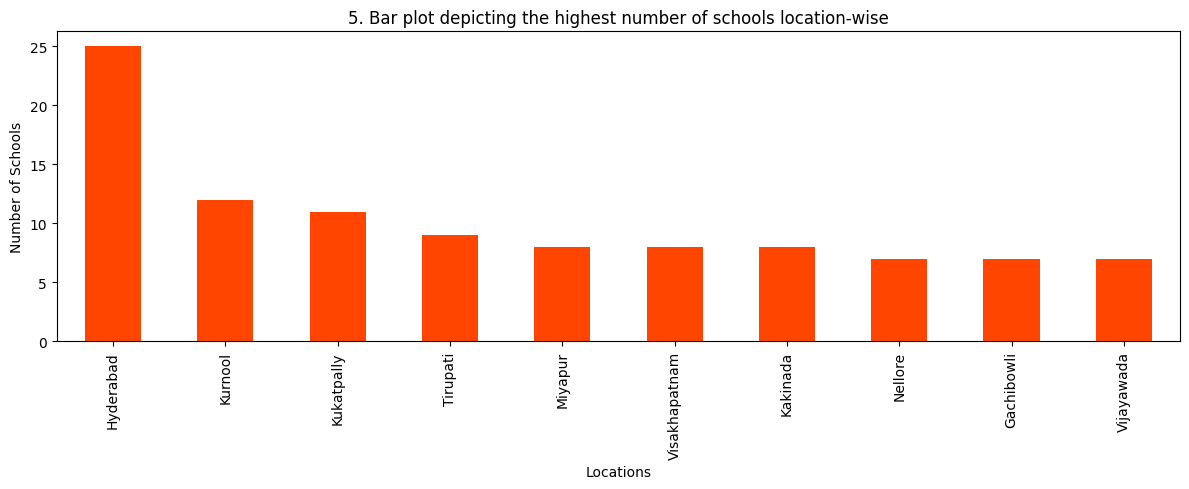

In [53]:
plt.figure(figsize=(12,5))
df['Location'].value_counts().head(10).plot(kind = 'bar',color = 'orangered')
plt.xlabel('Locations')
plt.ylabel('Number of Schools')
plt.title("5. Bar plot depicting the highest number of schools location-wise")
plt.xticks(rotation=90)
plt.show()

##### Inference 5: Hyderabad location has highest number of schools

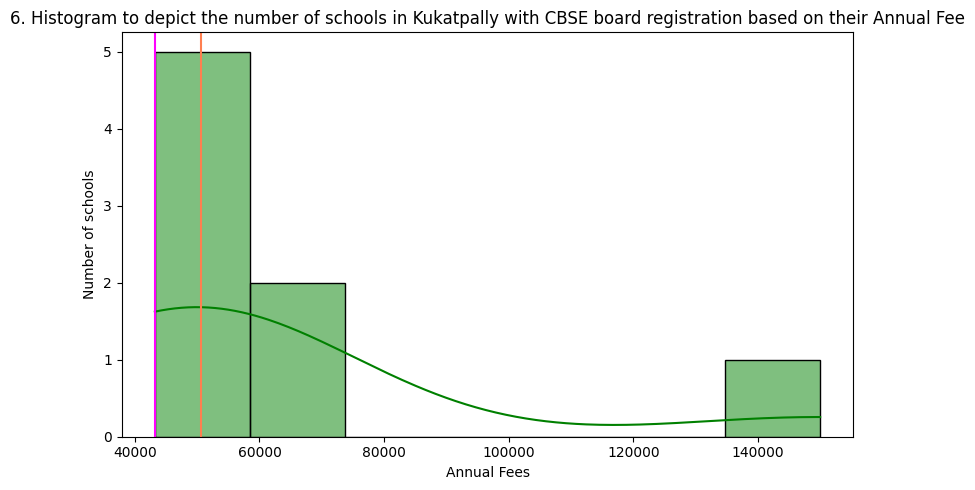

In [135]:
plt.figure(figsize=(8,5))
sns.histplot(df[(df['Location'] == 'Kukatpally') & (df['Registered Boards'] == 'CBSE')]['Annual Fees'],kde = True,color = 'green')
plt.axvline(x=np.nanmean(df['Annual Fees']),color='coral')
plt.axvline(df['Annual Fees'].median(),color='magenta')
plt.xlabel("Annual Fees")
plt.ylabel("Number of schools")
plt.title("6. Histogram to depict the number of schools in Kukatpally with CBSE board registration based on their Annual Fee") 
plt.show()

##### Inference 6: The above histogram depicts that the schools having CBSE as board of education in Kukatpally location have varied fee structure with a minimum fee around Rs. 50000 and maximum around Rs. 1,50,000

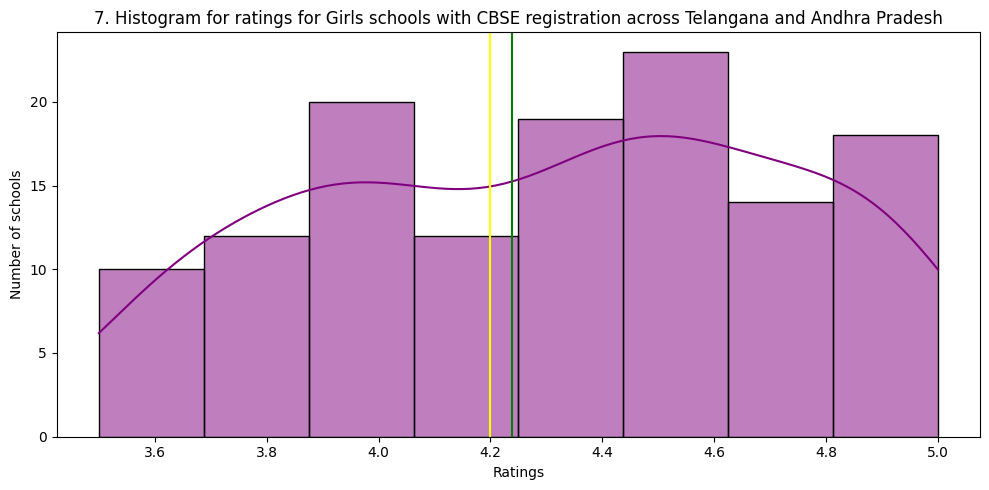

In [136]:
plt.figure(figsize=(10,5))
sns.histplot(df[(df['Gender'] == 'Girls') & (df['Registered Boards'] == 'CBSE')]['Ratings'],kde = True,color = 'purple')
plt.axvline(x=np.nanmean(df['Ratings']),color='green')
plt.axvline(df['Ratings'].median(),color='yellow')
plt.title("7. Histogram for ratings for Girls schools with CBSE registration across Telangana and Andhra Pradesh")
plt.xlabel("Ratings")
plt.ylabel("Number of schools")
plt.show()

##### Inference 7: From above histogram we can say that there are more CBSE schools belonging to 'Girls' category have ratings around 4.5

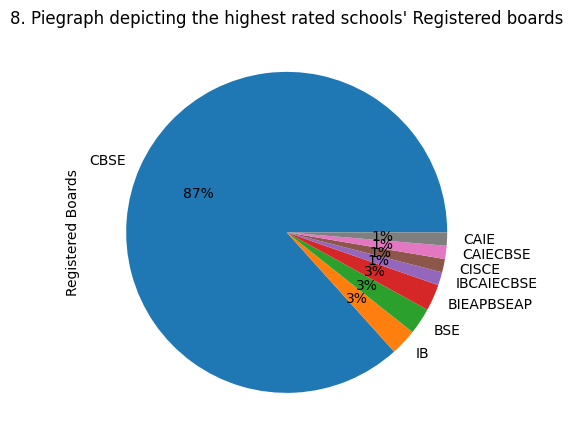

In [96]:
plt.figure(figsize=(5,5))
df[df['Ratings'] == 5 ]['Registered Boards'].value_counts().plot(kind = 'pie',autopct = '%0.0f%%')
plt.title("8. Piegraph depicting the highest rated schools' Registered boards")
plt.show()

##### Inference 8: Most of the schools having ra tings as 5 belong to CBSE

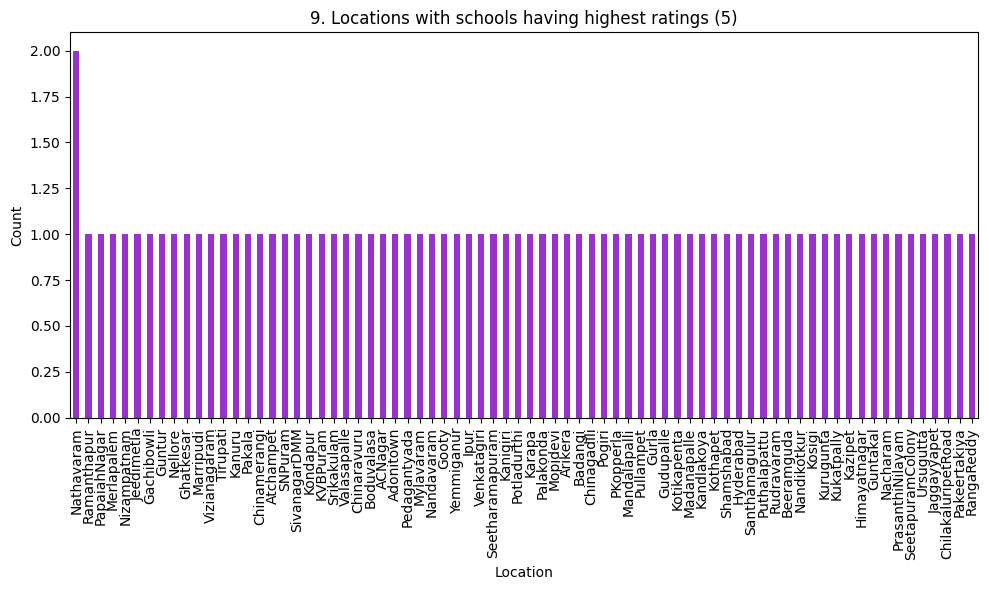

In [106]:
plt.figure(figsize=(10,6))
df[df['Ratings'] == 5 ]['Location'].value_counts().plot(kind = 'bar',color = 'darkorchid')
plt.title("9. Locations with schools having highest ratings (5)")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

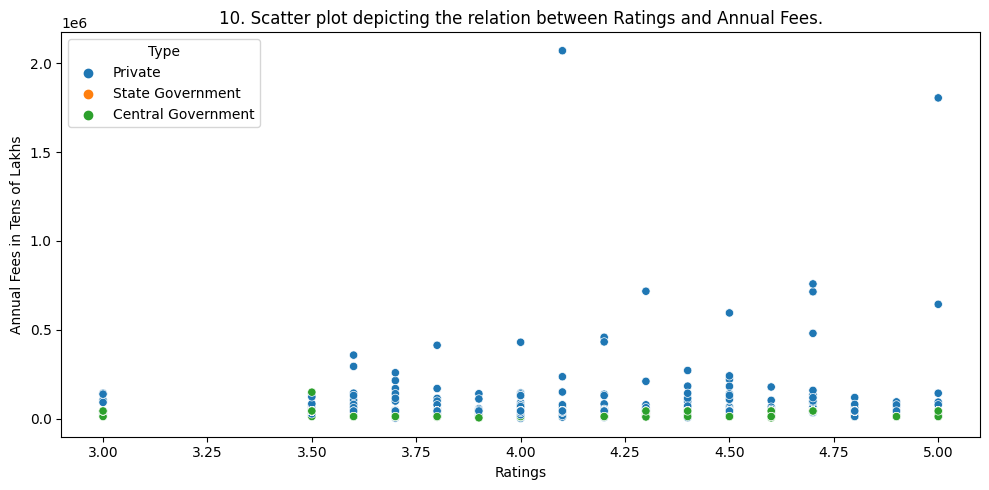

In [118]:
plt.figure(figsize=(10,5)) 
sns.scatterplot(data = df,x ='Ratings',y='Annual Fees',hue = 'Type')
plt.title("10. Scatter plot depicting the relation between Ratings and Annual Fees.")
plt.ylabel("Annual Fees in Tens of Lakhs")
plt.xlabel("Ratings")
plt.show()

##### Inference 10:  Some schools with ratings above 4 have highest fee structure

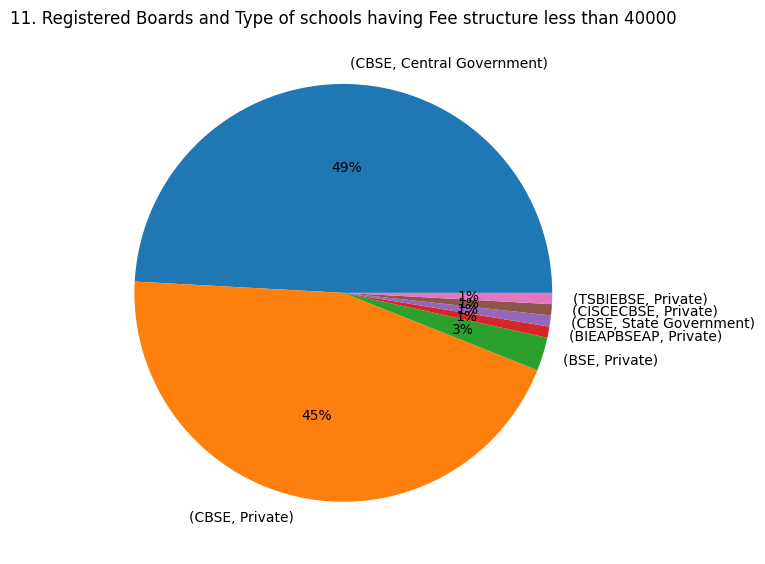

In [113]:
plt.figure(figsize=(7,7))
df[df['Annual Fees'] < 40000][['Registered Boards','Type']].value_counts().plot(kind = 'pie',autopct = "%0.0f%%")
plt.title("11. Registered Boards and Type of schools having Fee structure less than 40000")
plt.show()

##### Inference 11: CBSE board under Central Government has more number of schools having less fee structure

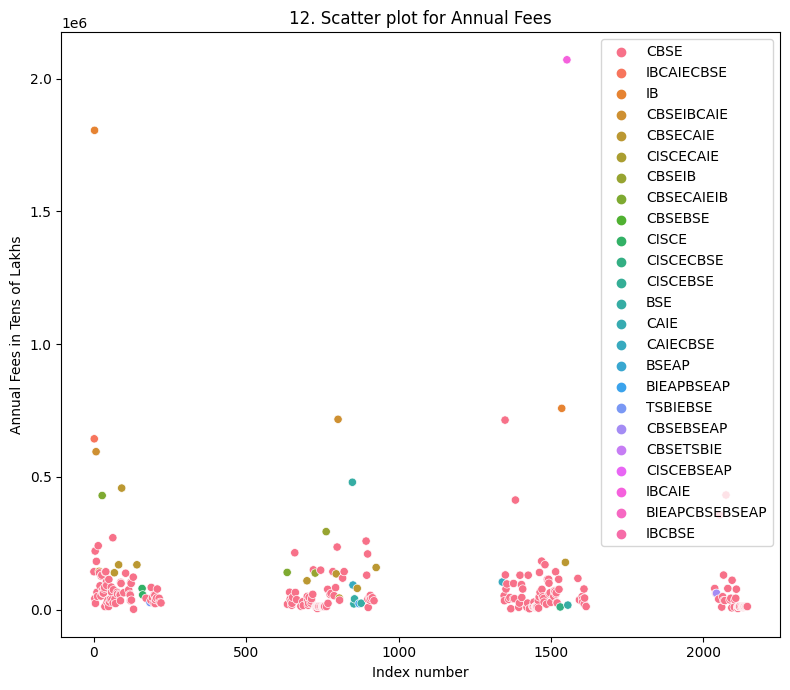

In [149]:
plt.figure(figsize=(8,7))
sns.scatterplot(data = df,x = df.index, y = 'Annual Fees',hue = 'Registered Boards',legend = True)
plt.title("12. Scatter plot for Annual Fees")
plt.ylabel("Annual Fees in Tens of Lakhs")
plt.xlabel("Index number")
plt.legend()
plt.show()

##### Inference 12: From above scatter plot we can say that the schools having IB and CAIE have maximum fee amount nearly 19 Lakhs. Also, we can infer that more number of schools are registered under CBSE board.

C:\Users\Vipra\AppData\Local\Temp\ipykernel_8868\2178494386.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


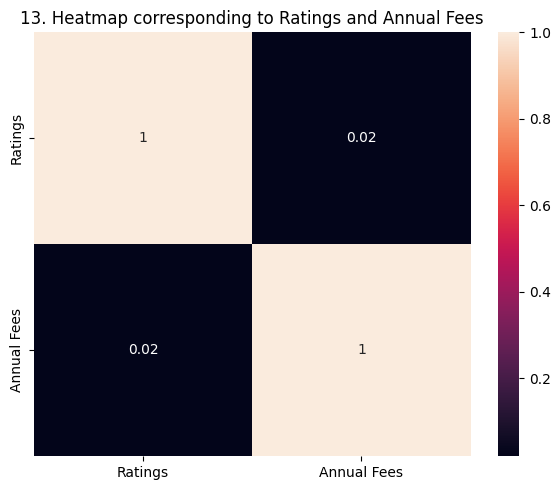

In [121]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot = True)
plt.title("13. Heatmap corresponding to Ratings and Annual Fees")
plt.show()

##### Inference 13: There is hardly any correlation between Annual Fees and Ratings, which means that ratings and annual fees do not affect each other.

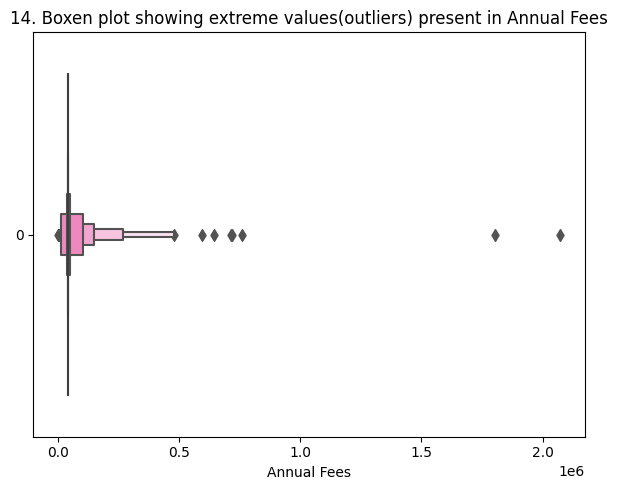

In [141]:
plt.figure(figsize=(6,5))
sns.boxenplot(df['Annual Fees'],orient = 'h',color = 'deeppink')
plt.title("14. Boxen plot showing extreme values(outliers) present in Annual Fees")
plt.xlabel("Annual Fees")
plt.show()

##### Inference 14: Any value above 50000 can be considered as outliers, however these values are important for our analysis. Hence, we do not drop them.